<a href="https://colab.research.google.com/github/hemanshu16/ML_Labs/blob/main/Lab_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=0.2, random_state=0)
print(X)

[[ 2.17058568  0.85600391]
 [ 0.79717677  4.38116783]
 [ 2.24471791  0.86666164]
 [ 0.65349051  4.26123927]
 [ 0.76655949  4.01978374]
 [ 0.90668765  4.33505712]
 [-1.75639774  2.83031825]
 [-1.33701985  2.93539251]
 [ 2.18972647  0.97915603]
 [ 0.84940566  4.23123909]
 [ 1.12208819  4.32958391]
 [ 1.22232821  4.5442633 ]
 [ 2.14840001  0.59041492]
 [ 1.28282592  4.59765908]
 [-1.67585498  2.75259455]
 [ 2.42877931  1.07887259]
 [-1.54659452  2.7851866 ]
 [ 0.81364082  3.95853081]
 [-1.54055233  3.26055081]
 [-1.74778068  2.92831528]
 [-1.65562769  2.47320163]
 [-1.53476058  2.68426356]
 [-1.39887771  2.59449105]
 [ 0.79871293  3.90762803]
 [ 1.841117    1.10855401]
 [ 2.08064994  0.97806153]
 [ 1.90128431  1.0055135 ]
 [ 1.82223755  1.07782896]
 [-1.60074038  2.87000643]
 [-1.3725459   3.08258309]
 [ 1.00507879  4.59464203]
 [ 2.35291796  1.2768415 ]
 [ 1.97254373  0.7481727 ]
 [ 1.27508589  4.26275567]
 [-1.61801051  2.92137809]
 [-1.05027506  3.10677816]
 [ 0.95562631  4.38590703]
 

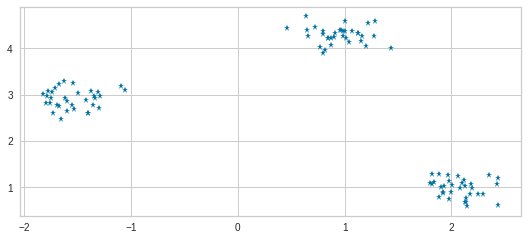

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


x = []
y = []
for temp in X:
  x.append(temp[0])
  y.append(temp[1])

plt.plot(x, y, '*')

plt.show()

In [37]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
print("Clustert Labels \n",y_km)
print("CLuster Centers \n",km.cluster_centers_)

Clustert Labels 
 [0 2 0 2 2 2 1 1 0 2 2 2 0 2 1 0 1 2 1 1 1 1 1 2 0 0 0 0 1 1 2 0 0 2 1 1 2
 0 0 1 1 0 0 2 2 2 0 0 1 1 1 0 2 0 1 1 0 0 2 0 0 1 1 1 1 0 2 1 0 2 1 2 2 0
 0 2 2 2 1 0 2 2 0 2 0 2 2 2 0 2 0 0 1 1 1 1 2 2 1 1]
CLuster Centers 
 [[ 2.0720792   0.98848385]
 [-1.538563    2.91165191]
 [ 0.95164831  4.28882085]]


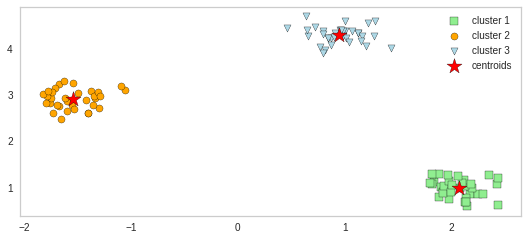

In [38]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [39]:
from sklearn.metrics.cluster import silhouette_score

score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.882


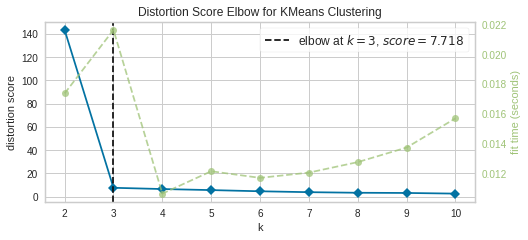

In [41]:
# Import the KElbowVisualizer method
# Instantiate a scikit-learn K-Means model
# Instantiate the KElbowVisualizer with the number of clusters and the metric
# Fit the data and visualize
from yellowbrick.cluster import KElbowVisualizer
elb_visualizer = KElbowVisualizer(km)
elb_visualizer.fit(X)    
elb_visualizer.show()  

Hand Written Digit Recognition

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [46]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
#print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [47]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [62]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape


(10, 64)

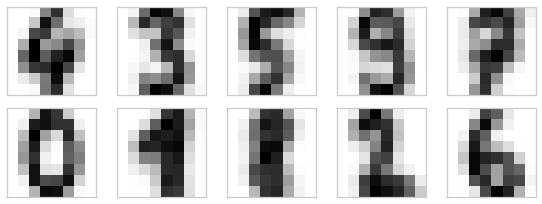

In [60]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)